In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

%matplotlib inline


In [2]:
train_values_damage = pd.read_csv('train_values_damage.csv', low_memory=False)
train_values_damage.head(10)

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,802906,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,3
1,1,28830,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,2
2,2,94947,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,3
3,3,590882,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,2
4,4,201944,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,3
5,5,333020,8,558,6089,2,10,9,5,t,...,0,0,0,0,0,0,0,0,0,2
6,6,728451,9,475,12066,2,25,3,4,n,...,0,0,0,0,0,0,0,0,0,3
7,7,475515,20,323,12236,2,0,8,6,t,...,0,0,0,0,0,0,0,0,0,1
8,8,441126,0,757,7219,2,15,8,6,t,...,0,0,0,0,0,0,0,0,0,2
9,9,989500,26,886,994,1,0,13,4,t,...,0,0,0,0,0,0,0,0,0,1


In [3]:
train_values_damage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 41 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Unnamed: 0                              260601 non-null  int64 
 1   building_id                             260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [4]:
datosConstruccion=train_values_damage.loc[:,['building_id','land_surface_condition','foundation_type',\
                                        'roof_type','ground_floor_type','other_floor_type',\
                                        'position','plan_configuration','damage_grade']]
datosConstruccion.head(10)

,building_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,damage_grade
0,802906,t,r,n,f,q,t,d,3
1,28830,o,r,n,x,q,s,d,2
2,94947,t,r,n,f,x,t,d,3
3,590882,t,r,n,f,x,s,d,2
4,201944,t,r,n,f,x,s,d,3
5,333020,t,r,n,f,q,s,d,2
6,728451,n,r,n,x,q,s,d,3
7,475515,t,w,q,v,x,s,u,1
8,441126,t,r,q,f,q,s,d,2
9,989500,t,i,n,v,j,s,d,1


# *Los edificios que se construyeron, sobre que condicion de superficie, predominan?

In [56]:
aux=datosConstruccion['land_surface_condition'].value_counts()
aux

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [58]:
#condSuperficie_grdaño.pivot(index='condicion_de_la_superficie',columns='nivel_de_daño',values='cantidad')
ordered = sorted(aux.items(), key=lambda x: x[1], reverse=True)
ordered

[('t', 216757), ('n', 35528), ('o', 8316)]

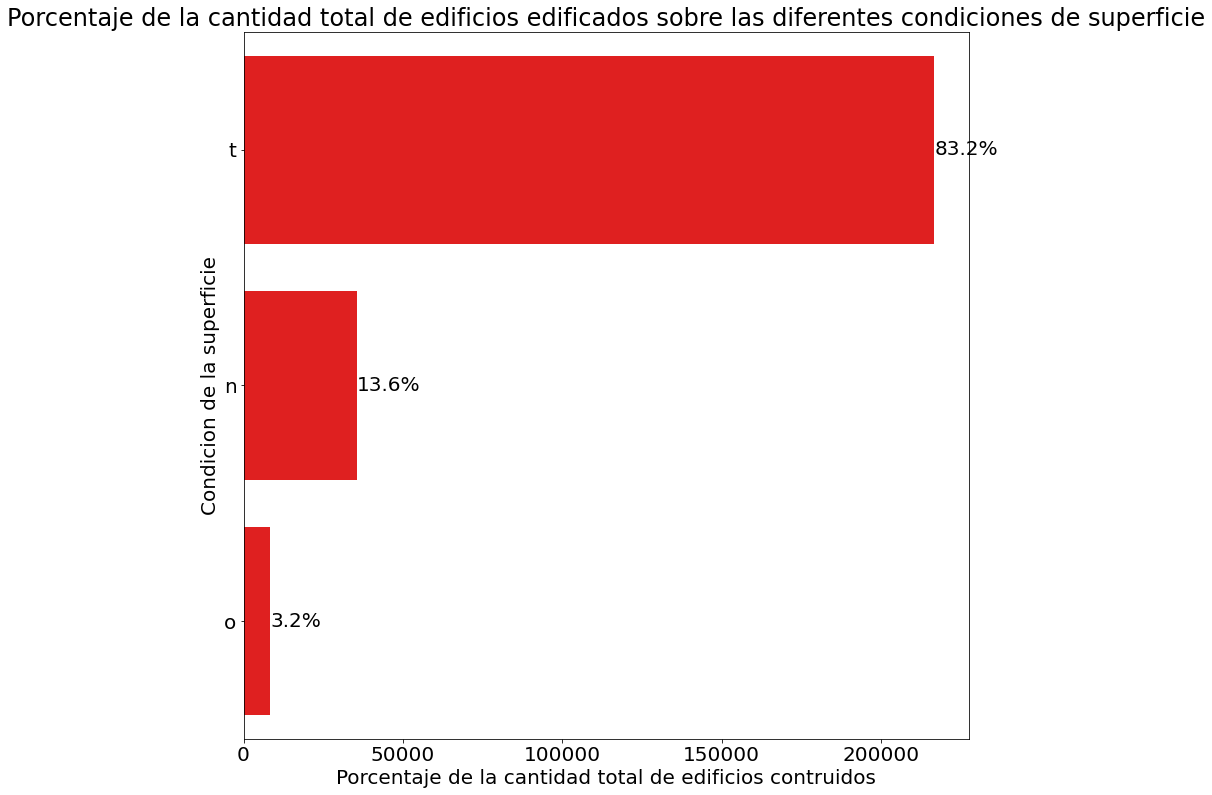

In [78]:
ordered = sorted(aux.items(), key=lambda x: x[1], reverse=True)
order = [ valor for valor, contador in ordered ]
plt.figure(figsize=[13,13])

sns.countplot(data=datosConstruccion, y='land_surface_condition', color="red", order=order)
plt.xlabel('Porcentaje de la cantidad total de edificios contruidos')
plt.ylabel('Condicion de la superficie')
plt.title('Porcentaje de la cantidad total de edificios edificados sobre las diferentes condiciones de superficie')
totaledificios = aux.values.sum()
for i, (valor, contador) in enumerate(ordered):
   pcnt = '{:0.1f}%'.format(100*contador/totaledificios)
   plt.text(contador-20, i, pcnt, va ='center')

# * Porcentaje de edificios construidos sobre, condiciones de superficie (n,o,t), que grados de destruccion tendran?

In [22]:
condSuperficie_grdaño=datosConstruccion[['land_surface_condition','damage_grade']]
condSuperficie_grdaño.head()

,land_surface_condition,damage_grade
0,t,3
1,o,2
2,t,3
3,t,2
4,t,3


In [23]:
condSuperficie_grdaño['cantidad']=1
condSuperficie_grdaño=condSuperficie_grdaño.groupby(['land_surface_condition','damage_grade']).agg({'cantidad':'sum'})
condSuperficie_grdaño.reset_index(inplace=True)
condSuperficie_grdaño.head()

/home/sherly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,land_surface_condition,damage_grade,cantidad
0,n,1,2556
1,n,2,21484
2,n,3,11488
3,o,1,602
4,o,2,4708


In [24]:
condSuperficie_grdaño=condSuperficie_grdaño.rename(columns={'land_surface_condition':'condicion_de_la_superficie','damage_grade':'nivel_de_daño'})
condSuperficie_grdaño

,condicion_de_la_superficie,nivel_de_daño,cantidad
0,n,1,2556
1,n,2,21484
2,n,3,11488
3,o,1,602
4,o,2,4708
5,o,3,3006
6,t,1,21966
7,t,2,122067
8,t,3,72724


### Sacamos el porcentaje de edificios construidos sobre diferentes condiciones de superficie y ver los daños causados

In [25]:
tableSurface_grade=pd.crosstab(condSuperficie_grdaño.nivel_de_daño,condSuperficie_grdaño.condicion_de_la_superficie,values=condSuperficie_grdaño.cantidad, aggfunc=np.sum, normalize="columns")
tableSurface_grade=(tableSurface_grade*100).round(2)
tableSurface_grade

condicion_de_la_superficie,n,o,t
nivel_de_daño,,,
1,7.19,7.24,10.13
2,60.47,56.61,56.32
3,32.34,36.15,33.55


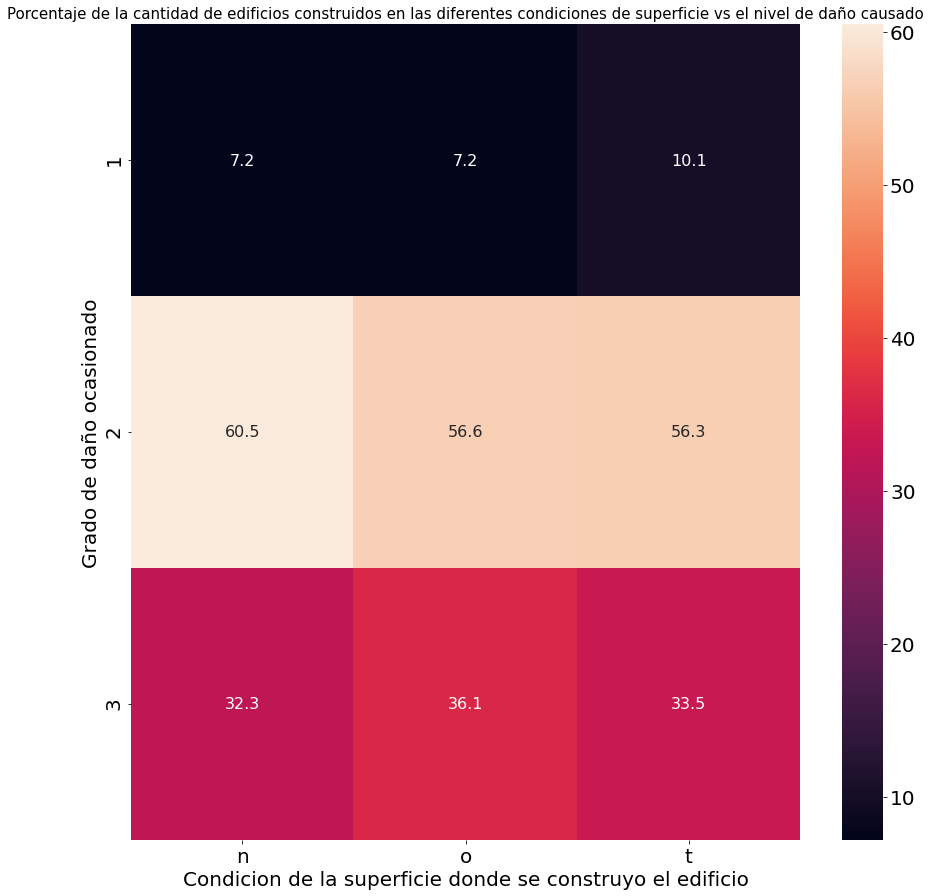

In [209]:
plt.figure(figsize=[15,15])
plt.rcParams['font.size'] = 20
plt.title("Porcentaje de la cantidad de edificios construidos en las diferentes condiciones de superficie vs el nivel de daño causado",fontsize=15)
sns.heatmap(tableSurface_grade, annot=True,fmt=".1f",annot_kws={'size':16})
plt.xlabel('Condicion de la superficie donde se construyo el edificio')
plt.ylabel('Grado de daño ocasionado')
plt.show()

In [47]:
#condSuperficie_grdaño=condSuperficie_grdaño.pivot(index='condicion de la superficie',columns='nivel de daño',values='cantidad')

### Podemos observar que existe un 60.5% de los edificios construidos sobre superficies en condiciones "n" que sufre daños de segundo grado.
### Ademas podemos ver que existe un mayor porcentaje de edificios construidos en los diferentes superficies que sufren daños de segundo grado

# *Porcentaje de edificios construidos usando un tipo de cimiento (h,i,r,u,w), que grados de destruccion tendran?

In [75]:
auxcimiento=datosConstruccion['foundation_type'].value_counts()
auxcimiento

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [80]:
ordered2 = sorted(auxcimiento.items(), key=lambda x: x[1], reverse=True)
ordered2

[('r', 219196), ('w', 15118), ('u', 14260), ('i', 10579), ('h', 1448)]

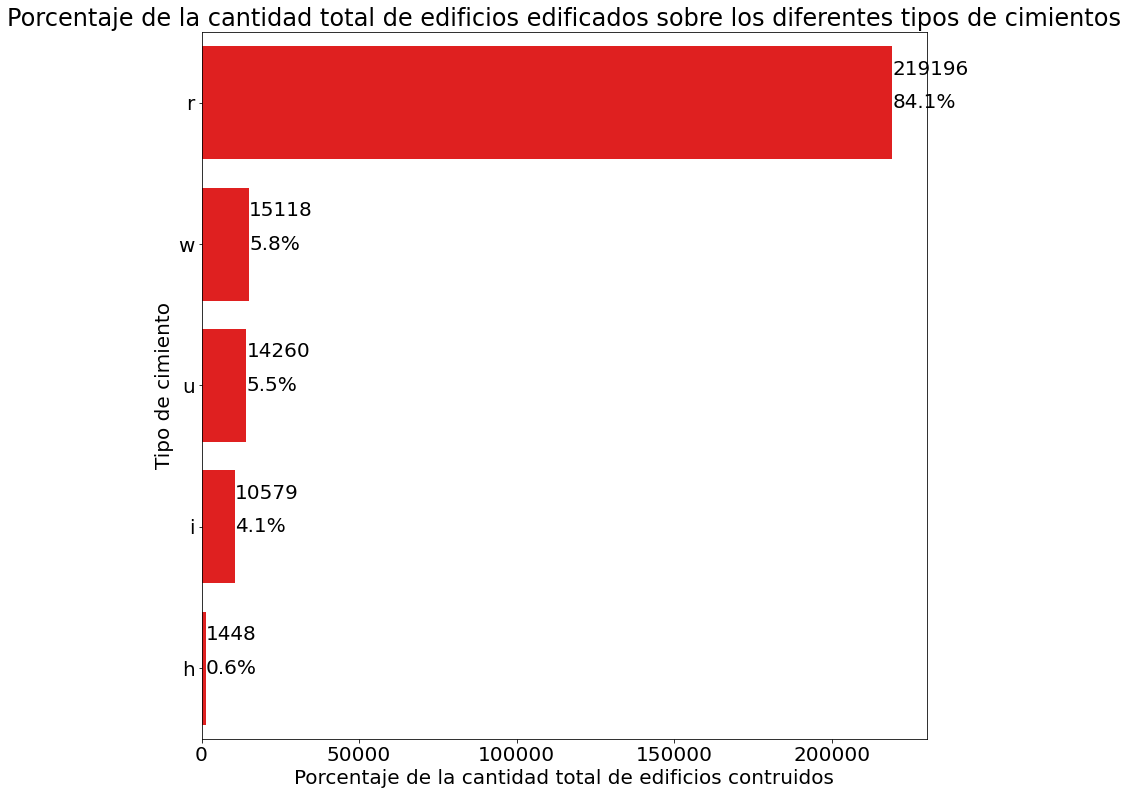

In [119]:
ordered2 = sorted(auxcimiento.items(), key=lambda x: x[1], reverse=True)
order2 = [ valor for valor, contador in ordered2 ]

plt.figure(figsize=[13,13])

sns.countplot(data=datosConstruccion, y='foundation_type', color="red", order=order2)
plt.xlabel('Porcentaje de la cantidad total de edificios contruidos')
plt.ylabel('Tipo de cimiento')
plt.title('Porcentaje de la cantidad total de edificios edificados sobre los diferentes tipos de cimientos')
totaledificios2 = auxcimiento.values.sum()
for i, (valor, contador) in enumerate(ordered2):
   pcnt = '{:0.1f}%'.format(100*contador/totaledificios2)
   plt.text(contador, i-0.2, contador )
   plt.text(contador, i, pcnt, va ='center')

In [74]:
cimientos_grdaño=datosConstruccion[['foundation_type','damage_grade']]
cimientos_grdaño.head()

,foundation_type,damage_grade
0,r,3
1,r,2
2,r,3
3,r,2
4,r,3


In [121]:
cimientos_grdaño['cantidad']=1
cimientos_grdaño=cimientos_grdaño.groupby(['foundation_type','damage_grade']).agg({'cantidad':'sum'})
cimientos_grdaño.reset_index(inplace=True)
cimientos_grdaño.head()

/home/sherly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,foundation_type,damage_grade,cantidad
0,h,1,358
1,h,2,579
2,h,3,511
3,i,1,6004
4,i,2,4354


In [122]:
tablacimiento_grade=pd.crosstab(cimientos_grdaño.damage_grade,cimientos_grdaño.foundation_type,values=cimientos_grdaño.cantidad, aggfunc=np.sum, normalize="columns")
tablacimiento_grade=(tablacimiento_grade*100).round(2)
tablacimiento_grade

foundation_type,h,i,r,u,w
damage_grade,,,,,
1,24.72,56.75,4.89,25.87,28.79
2,39.99,41.16,57.26,59.89,61.32
3,35.29,2.09,37.85,14.24,9.89


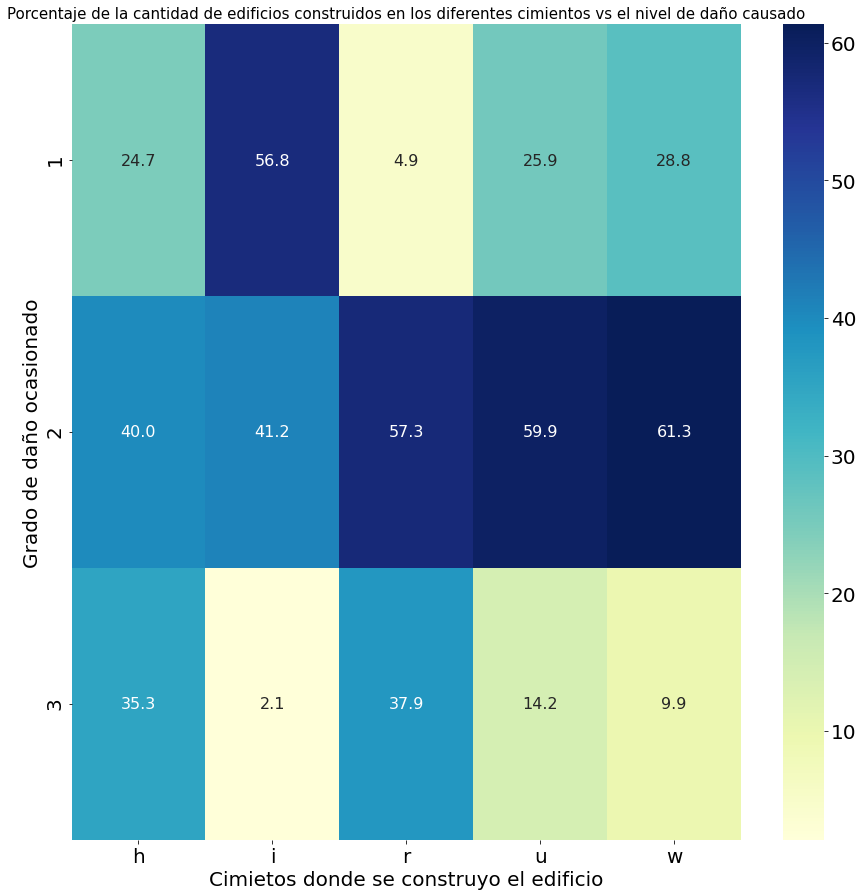

In [123]:
plt.figure(figsize=[15,15])
plt.rcParams['font.size'] = 20
plt.title("Porcentaje de la cantidad de edificios construidos en los diferentes cimientos vs el nivel de daño causado",fontsize=15)
sns.heatmap(tablacimiento_grade, annot=True,fmt=".1f",cmap="YlGnBu",annot_kws={'size':16})
plt.xlabel('Cimietos donde se construyo el edificio')
plt.ylabel('Grado de daño ocasionado')
plt.show()

# Veamos como influyen la construccion de los techos, como la que se usa para los diferentes pisos en el Grado de daño de destruccion

In [186]:
construccion_techo_pisos=datosConstruccion[['roof_type','ground_floor_type','other_floor_type','damage_grade']]
construccion_techo_pisos.head()

,roof_type,ground_floor_type,other_floor_type,damage_grade
0,n,f,q,3
1,n,x,q,2
2,n,f,x,3
3,n,f,x,2
4,n,f,x,3


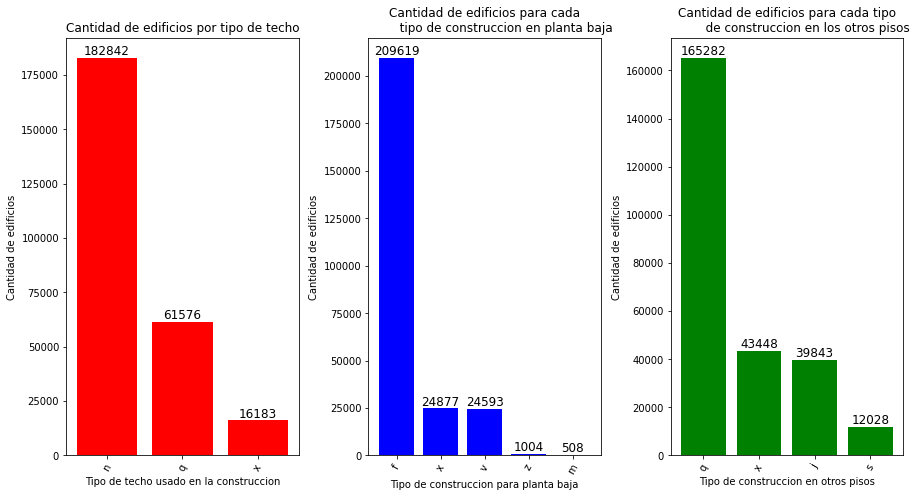

In [188]:
plt.figure(figsize=[15,10])   
x_values1 = construccion_techo_pisos.roof_type.unique()
y_values1 = construccion_techo_pisos.roof_type.value_counts().tolist()
ax = plt.subplot(1,3, 1)                   
plt.bar(x_values1, y_values1,color="red")          
plt.title('Cantidad de edificios por tipo de techo')     
ax.set_xticks(x_values1)             
ax.set_xticklabels(x_values1, rotation=60)       
ax.set_xlabel('Tipo de techo usado en la construccion')  
ax.set_ylabel('Cantidad de edificios') 
rects = ax.patches 
for rect, y in zip(rects, y_values1):
    ax.text(rect.get_x() + 0.4, y + 0.05, '%d' % y, ha='center', va= 'bottom',fontsize=12)




x_values2 = construccion_techo_pisos.ground_floor_type.unique()
y_values2 = construccion_techo_pisos.ground_floor_type.value_counts().tolist()
ax = plt.subplot(1,3, 2)                  
plt.bar(x_values2, y_values2,color="blue")          
plt.title('Cantidad de edificios para cada\n\
           tipo de construccion en planta baja')      
ax.set_xticks(x_values2)           
ax.set_xticklabels(x_values2, rotation=60)      
ax.set_xlabel('Tipo de construccion para planta baja')  
ax.set_ylabel('Cantidad de edificios')  
rects = ax.patches 
for rect, y in zip(rects, y_values2):
    ax.text(rect.get_x() + 0.4, y + 0.05, '%d' % y, ha='center', va= 'bottom',fontsize=12)


x_values3 = construccion_techo_pisos.other_floor_type.unique()
y_values3 = construccion_techo_pisos.other_floor_type.value_counts().tolist()
ax = plt.subplot(1,3, 3)                   
plt.bar(x_values3, y_values3,color="green")          
plt.title('Cantidad de edificios para cada tipo\n\
           de construccion en los otros pisos')      
ax.set_xticks(x_values3)             
ax.set_xticklabels(x_values3, rotation=60)        
ax.set_xlabel('Tipo de construccion en otros pisos')  
ax.set_ylabel('Cantidad de edificios')  
rects = ax.patches 
for rect, y in zip(rects,y_values3):
    ax.text(rect.get_x() + 0.4, y + 0.05, '%d' % y, ha='center', va= 'bottom',fontsize=12)




plt.subplots_adjust(wspace=0.3, bottom=0.3)
plt.show()
plt.close('all')

In [190]:
construccion_techo_pisos['cantidad']=1
construccion_techo_pisos.head()

,roof_type,ground_floor_type,other_floor_type,damage_grade,cantidad
0,n,f,q,3,1
1,n,x,q,2,1
2,n,f,x,3,1
3,n,f,x,2,1
4,n,f,x,3,1


In [ ]:
plt.figure(figsize=[15,15])

cimientos_grdaño=datosConstruccion[['foundation_type','damage_grade']]
cimientos_grdaño=cimientos_grdaño.groupby(['foundation_type','damage_grade']).agg({'cantidad':'sum'})
cimientos_grdaño.reset_index(inplace=True)
cimientos_grdaño.head()

tablacimiento_grade=pd.crosstab(cimientos_grdaño.damage_grade,cimientos_grdaño.foundation_type,values=cimientos_grdaño.cantidad, aggfunc=np.sum, normalize="columns")
tablacimiento_grade=(tablacimiento_grade*100).round(2)
tablacimiento_grade

plt.figure(figsize=[15,15])
plt.rcParams['font.size'] = 20
ax = plt.subplot(1,3, 1)  
plt.title("Porcentaje de la cantidad de edificios construidos en los diferentes cimientos vs el nivel de daño causado",fontsize=15)
sns.heatmap(tablacimiento_grade, annot=True,fmt=".1f",cmap="YlGnBu",annot_kws={'size':16})
plt.xlabel('Cimietos donde se construyo el edificio')
plt.ylabel('Grado de daño ocasionado')
plt.show()

# Que grado de daño sufrieron los edificion con una construccion de diseño sismico

In [191]:
construc_sismico=datosConstruccion[['plan_configuration','damage_grade']]
construc_sismico.head(10)

,plan_configuration,damage_grade
0,d,3
1,d,2
2,d,3
3,d,2
4,d,3
5,d,2
6,d,3
7,u,1
8,d,2
9,d,1


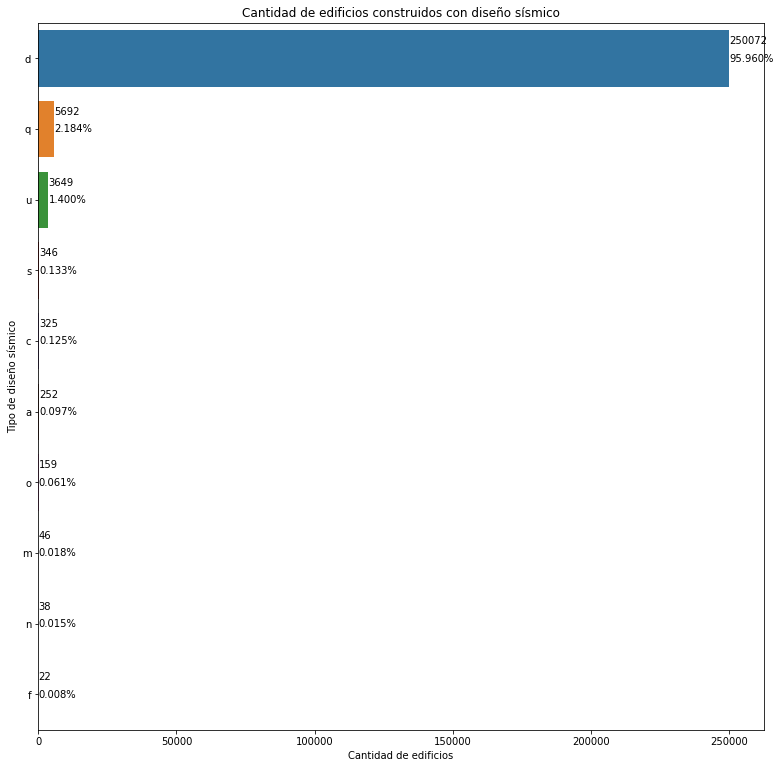

In [195]:
auxsismico=construc_sismico['plan_configuration'].value_counts()

ordered2 = sorted(auxsismico.items(), key=lambda x: x[1], reverse=True)
order2 = [ valor for valor, contador in ordered2 ]

plt.figure(figsize=[13,13])

sns.countplot(data=construc_sismico, y='plan_configuration', order=order2)
plt.xlabel('Cantidad de edificios')
plt.ylabel('Tipo de diseño sísmico')
plt.title('Cantidad de edificios construidos con diseño sísmico')
totaledificios2 = auxcimiento.values.sum()
for i, (valor, contador) in enumerate(ordered2):
   pcnt = '{:0.3f}%'.format(100*contador/totaledificios2)
   plt.text(contador, i-0.2, contador )
   plt.text(contador, i, pcnt, va ='center')

In [203]:
construc_sismico['cantidad']=1
construcSismico_grdaño=construc_sismico.groupby(['plan_configuration','damage_grade']).agg({'cantidad':'sum'})
construcSismico_grdaño.reset_index(inplace=True)
construcSismico_grdaño.head()

,plan_configuration,damage_grade,cantidad
0,a,1,66
1,a,2,157
2,a,3,29
3,c,1,86
4,c,2,206


In [208]:
construcSismico_grdaño.pivot(index='plan_configuration',columns='damage_grade',values='cantidad')

damage_grade,1,2,3
plan_configuration,,,
a,66.0,157.0,29.0
c,86.0,206.0,33.0
d,23310.0,142523.0,84239.0
f,NaN,16.0,6.0
m,8.0,34.0,4.0
n,6.0,20.0,12.0
o,40.0,96.0,23.0
q,781.0,2585.0,2326.0
s,53.0,223.0,70.0


In [206]:
tablasismico_grade=pd.crosstab(construcSismico_grdaño.damage_grade,construcSismico_grdaño.plan_configuration,values=construcSismico_grdaño.cantidad, aggfunc=np.sum, normalize="columns")
tablasismico_grade=(tablasismico_grade*100).round(3)
tablasismico_grade

plan_configuration,a,c,d,f,m,n,o,q,s,u
damage_grade,,,,,,,,,,
1,26.190,26.462,9.321,0.000,17.391,15.789,25.157,13.721,15.318,21.211
2,62.302,63.385,56.993,72.727,73.913,52.632,60.377,45.415,64.451,65.744
3,11.508,10.154,33.686,27.273,8.696,31.579,14.465,40.864,20.231,13.045


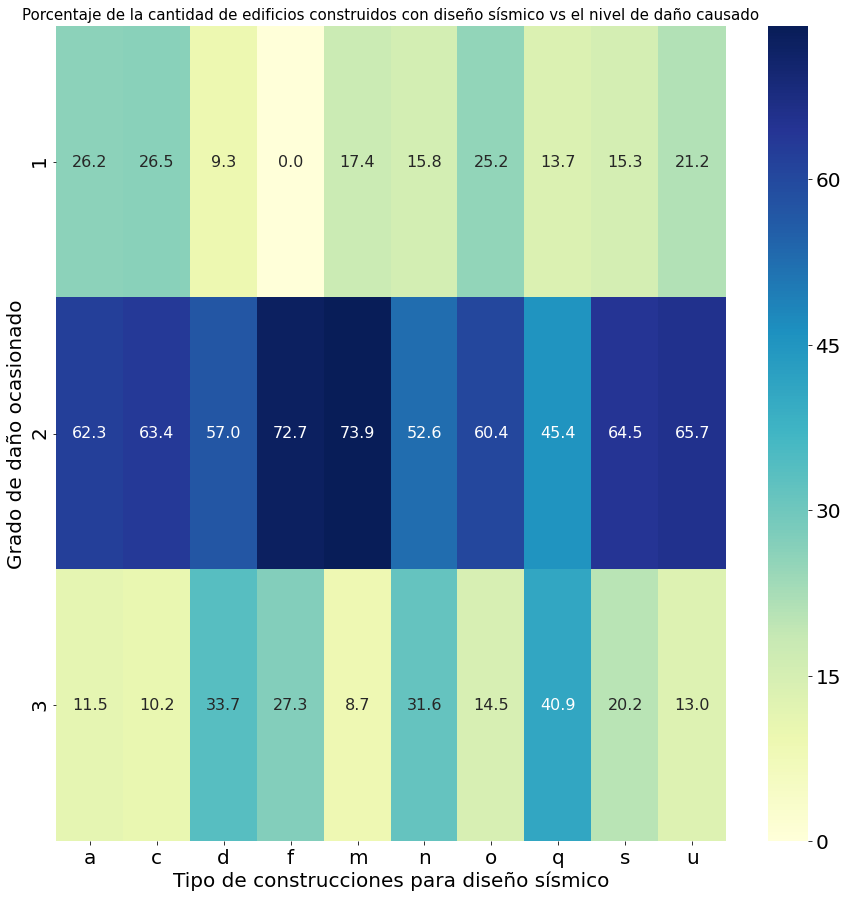

In [202]:
plt.figure(figsize=[15,15])
plt.rcParams['font.size'] = 20
plt.title("Porcentaje de la cantidad de edificios construidos con diseño sísmico vs el nivel de daño causado",fontsize=15)
sns.heatmap(tablasismico_grade, annot=True,fmt=".1f",cmap="YlGnBu",annot_kws={'size':16})
plt.xlabel('Tipo de construcciones para diseño sísmico')
plt.ylabel('Grado de daño ocasionado')
plt.show()